<a href="https://colab.research.google.com/github/LarryDCJ/AC_Classifier/blob/master/Kaggle_TitanicCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Titanic Kaggle Dataset is a great introduction regression problem that can leverage machine learning to output a predicition, outputting a number between 0 and 1. 

This is different from classification, where you are trying to predict "is it this or that?".

In [ ]:
from google.colab import drive
import os
import numpy as np #linear algebra tools
import pandas as pd # data processing and CSV manipulation (r/w)
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

#changing the working directory
%cd /content/drive/MyDrive/kaggle
!pwd

In [ ]:
!kaggle competitions list

In [ ]:
!kaggle datasets list -s Titanic

In [ ]:
#User datasets
!kaggle datasets download [USER/FILENAME]

#I prefer this one
!kaggle competitions download -c [COMPETITION]

!unzip [FILENAME.zip]
!ls

https://towardsdatascience.com/how-to-search-and-download-data-using-kaggle-api-f815f7b98080

This is the link for Kaggle+Colab instructions.


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head()

In [ ]:
test_data = pd.read_csv("test.csv")
test_data.head()

In [ ]:
#This code lets us know the % of women that actually survived.
#By grabbing all columns from the TRAIN dataset, we can divide the amount of surviving
#women by the total amount of women, leaving us with about 74.2%.

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

In [ ]:
#This does the same with men, coming to about 18.9% (RIP fellas).

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

Why do you think the numbers are so heavily favored for women?

Questioning your data and the simple metrics gleaned from the data can help guide deeper insight into the problems you have along with the solutions you're searching for.

To gain a better prediction, we can use the information from multiple columns rather than only basing our prediction on the sex of the passsengers.

To do this, we will implement a RANDOM FOREST MODEL. 


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

This is how you submit a prediction to a competition.

In [ ]:
#!kaggle competitions submit -c [COMPETITION NAME] -f [FILE PATH]
!kaggle competitions submit -c Titanic -f '/content/drive/MyDrive/kaggle/my_submission.csv' -m "My first Random Forest Model Submission"

Spacer

Spacer

Now, we'll implement fast.ai instructions to work with tabular data. If you want to know more about fast.ai, check out their free MOOC here: https://course.fast.ai

In [ ]:
!pip install fastai
!pip install nbdev
import fastai
from fastai.tabular.all import *
from nbdev.showdoc import *

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/kaggle/'): 
  for filename in filenames: 
    print(os.path.join(dirname, filename))

In [ ]:
fastai.__version__

In [ ]:
df_train = pd.read_csv('train.csv')
print(df_train.shape, df_train.head())
df_train.info()

In [ ]:
df_test = pd.read_csv('test.csv')
print(df_test.shape, df_test.head())
df_test.info()

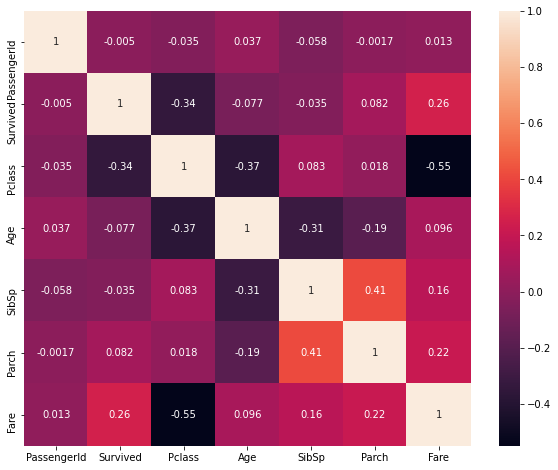

In [146]:
import seaborn as sns
correlation = df_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot = True)

In [ ]:
survival_by_gender = pd.crosstab(index = df_train['Survived'],columns = df_train['Sex'])
survival_by_gender.plot.bar()

In [ ]:
# AGE that survives the most
survival_by_age = pd.crosstab(index = df_train['Age'],columns = df_train['Survived'])
survival_by_age.plot.line()

# This histogram isn't a clear way to display this data. Uncomment to see for yourself.
#survival_by_age.plot.hist()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

In [120]:
df_train.replace(('male', 'female'), (1, 0), inplace=True)
df_test.replace(('male', 'female'), (1, 0), inplace=True)

We will remove the CABIN variable, since there are so many null values.

In [149]:
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [ ]:
df_train.isnull().sum()

In [125]:
procs = [Categorify, FillMissing, Normalize] 
splits = RandomSplitter(valid_pct = 0.21)(range_of(df_train))
cont_names, cat_names = cont_cat_split(df_train, 1, 'Survived')

In [ ]:
print(cat_names)
print(cont_names)

In [157]:
to = TabularPandas(df_train,procs,cat_names,cont_names,y_names='Survived',splits=splits)
to.show(5)

KeyError: ignored

In [ ]:
dls = to.dataloaders()
dls.valid.show_batch()

In [129]:
x_train, y_train = to.train.xs, to.train.y
x_test, y_test = to.valid.xs, to.valid.y

In [152]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_classifier.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8235294117647058

In [153]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(solver='lbfgs', max_iter=5000)
lr_classifier.fit(x_train, y_train)

y_pred = lr_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8288770053475936

In [154]:
# Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(x_train, y_train)

y_pred = lda_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8074866310160428

In [138]:
to_test = TabularPandas(df_test, procs, cat_names, cont_names)

Uncomment the model with the best performance.

In [155]:

outcome = lr_classifier.predict(to_test.xs.drop('Fare_na', axis=1))
# outcome = rf_classifier.predict(to_test.xs.drop('Fare_na', axis=1))
# outcome = lda_classifier.predict(to_test.xs.drop('Fare_na', axis=1))
output= pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived': outcome.astype(int)})
output.to_csv('./lr_submission_titanic.csv', index=False)

In [156]:
!kaggle competitions submit -c Titanic -f '/content/drive/MyDrive/kaggle/lr_submission_titanic.csv' -m "My first Logistic Regression Model Submission"

100% 2.77k/2.77k [00:00<00:00, 13.2kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster